In [3]:
import cv2
import matplotlib.pyplot as plt
from copy import copy
import pandas as pd
import os
import face_recognition
from PIL import Image
from tqdm import tqdm
import numpy as np
import re

In [4]:
def one_face_frames(list_of_df):
    list_of_one_face_shots_per_film = []
    for data in list_of_df:
        one = data.loc[data['num_of_faces'] == 1]
        pd.set_option('display.max_rows', None)
        list_of_one_face_shots_per_film.append(one.sort_values(by = 'face_percentage'))
    return list_of_one_face_shots_per_film

In [5]:
def compute_face_areas_with_percents_face_recognition(directory, small_face_percent_treshold=1.):
    
    columns_name = ['frame_num', 'num_of_faces', 'face_percentage', 'face_coordinates']
    data = pd.DataFrame(columns = columns_name)
    
    
#     percentages_of_area = []
    for file in tqdm(os.listdir(directory)):
        if file.endswith('.jpg'):
            image = face_recognition.load_image_file(os.path.join(directory, file))
            full_img_size = image.shape[0]*image.shape[1]
            all_face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=2)
            
            big_face_percentages = []
            big_face_locations = []
            for face_location in all_face_locations:
                top, right, bottom, left = face_location
                face_square = (bottom-top)*(right-left)
                percentage_of_face_in_img = (face_square/full_img_size)*100
                if percentage_of_face_in_img > small_face_percent_treshold:
                    big_face_percentages.append(round(percentage_of_face_in_img, 1))
                    big_face_locations.append(face_location)
                    
            dict_of_frames = {'frame_num': file, 'num_of_faces':len(big_face_locations), 
                              'face_percentage': big_face_percentages, 
                                  'face_coordinates': big_face_locations}

            data = data.append(dict_of_frames, ignore_index=True)
    return data

                
                

# Вычленение лиц из картинок

In [97]:
df_1967 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/1967')

100%|██████████| 8553/8553 [1:47:22<00:00,  1.33it/s]  


In [104]:
df_1967.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/Face_recognition_1967.csv')

In [4]:
df_1997 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/1997')

100%|██████████| 6468/6468 [3:04:03<00:00,  1.71s/it]  


In [5]:
df_1997.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/Face_recognition_1997.csv')

In [4]:
df_2009 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/2009')

100%|██████████| 9188/9188 [4:46:22<00:00,  1.87s/it]  


In [5]:
df_2009.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Face_recognition_2009.csv')

In [44]:
df_2009_add = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Новая папка')

100%|██████████| 6153/6153 [3:49:31<00:00,  2.24s/it]     


In [45]:
df_2009_add.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Face_recognition_2009_add.csv')

In [22]:
df_2012 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/2012')

100%|██████████| 7764/7764 [3:40:30<00:00,  1.70s/it]     


In [23]:
df_2012.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/Face_recognition_2012.csv')

In [9]:
df_2013 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/2013_original')

100%|██████████| 12106/12106 [4:08:24<00:00,  1.23s/it] 


In [10]:
df_2013.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2013/Face_recognition_2013.csv')

In [7]:
df_2017 = compute_face_areas_with_percents_face_recognition('/Users/tonleon/Desktop/Diploma/2017_original')

100%|██████████| 20895/20895 [3:42:39<00:00,  1.56it/s]  


In [8]:
df_2017.to_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2017/Face_recognition_2017.csv')

# Прочтение полученных данных

In [6]:
df_1967 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1967/Face_recognition_1967.csv')
df_1997 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/1997/Face_recognition_1997.csv')

df_2009 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Face_recognition_2009.csv')
df_2009_add = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2009/Face_recognition_2009_add.csv')
df_2009 = pd.concat([df_2009, df_2009_add],ignore_index=True)

df_2012 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2012/Face_recognition_2012.csv')
df_2013 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2013/Face_recognition_2013.csv')
df_2017 = pd.read_csv('/Users/tonleon/Documents/GitHub/Diploma/Films/Data/2017/Face_recognition_2017.csv')

In [7]:
df_1967['image_width'] = 708 
df_1967['image_height'] = 404

df_1997['image_width'] = 1280
df_1997['image_height'] = 528

df_2009['image_width'] = 1280
df_2009['image_height'] = 720

df_2012['image_width'] = 1132
df_2012['image_height'] = 474

df_2013['image_width'] = 1024
df_2013['image_height'] = 576

df_2017['image_width'] = 720
df_2017['image_height'] = 400

In [8]:
df_1967 = df_1967.rename(columns={'face_locations': 'face_coordinates'})
df_1997 = df_1997.rename(columns={'face_locations': 'face_coordinates'})
df_2009 = df_2009.rename(columns={'face_locations': 'face_coordinates'})
df_2012 = df_2012.rename(columns={'face_locations': 'face_coordinates'})
df_2013 = df_2013.rename(columns={'face_locations': 'face_coordinates'})
df_2017 = df_2017.rename(columns={'face_locations': 'face_coordinates'})
# df = df.rename(columns={'face_coordinates': 'face_locations'})

In [9]:
df_1997.head()

,Unnamed: 0,frame_num,num_of_faces,face_percentage,face_coordinates,image_width,image_height
0,0,1997_1_2913.jpg,0,[],[],1280,528
1,1,1997_1_2907.jpg,0,[],[],1280,528
2,2,1997_1_5098.jpg,1,[2.6],"[(70, 901, 204, 768)]",1280,528
3,3,1997_1_4386.jpg,1,[7.9],"[(173, 840, 405, 609)]",1280,528
4,4,1997_1_5926.jpg,1,[23.6],"[(35, 1010, 434, 611)]",1280,528


In [10]:
list_of_all_films_df = [df_1967, df_1997, df_2009, df_2012, df_2013, df_2017]

In [11]:
import ast
def str_in_df_to_list(list_of_df, name_of_column):
    for df in list_of_df:
        for index, row in df.iterrows():
            list_of_perc = ast.literal_eval(row[name_of_column])
            df.at[index,name_of_column] = list_of_perc

In [12]:
str_in_df_to_list(list_of_all_films_df, 'face_percentage')
str_in_df_to_list(list_of_all_films_df, 'face_coordinates')

# Распределение количества и процентов лиц

In [13]:
all_num_of_faces = []
for df in list_of_all_films_df:
    num_of_faces = []
    for num in df['num_of_faces']:
        if num !=0:
            num_of_faces.append(num)
    all_num_of_faces.append(num_of_faces)

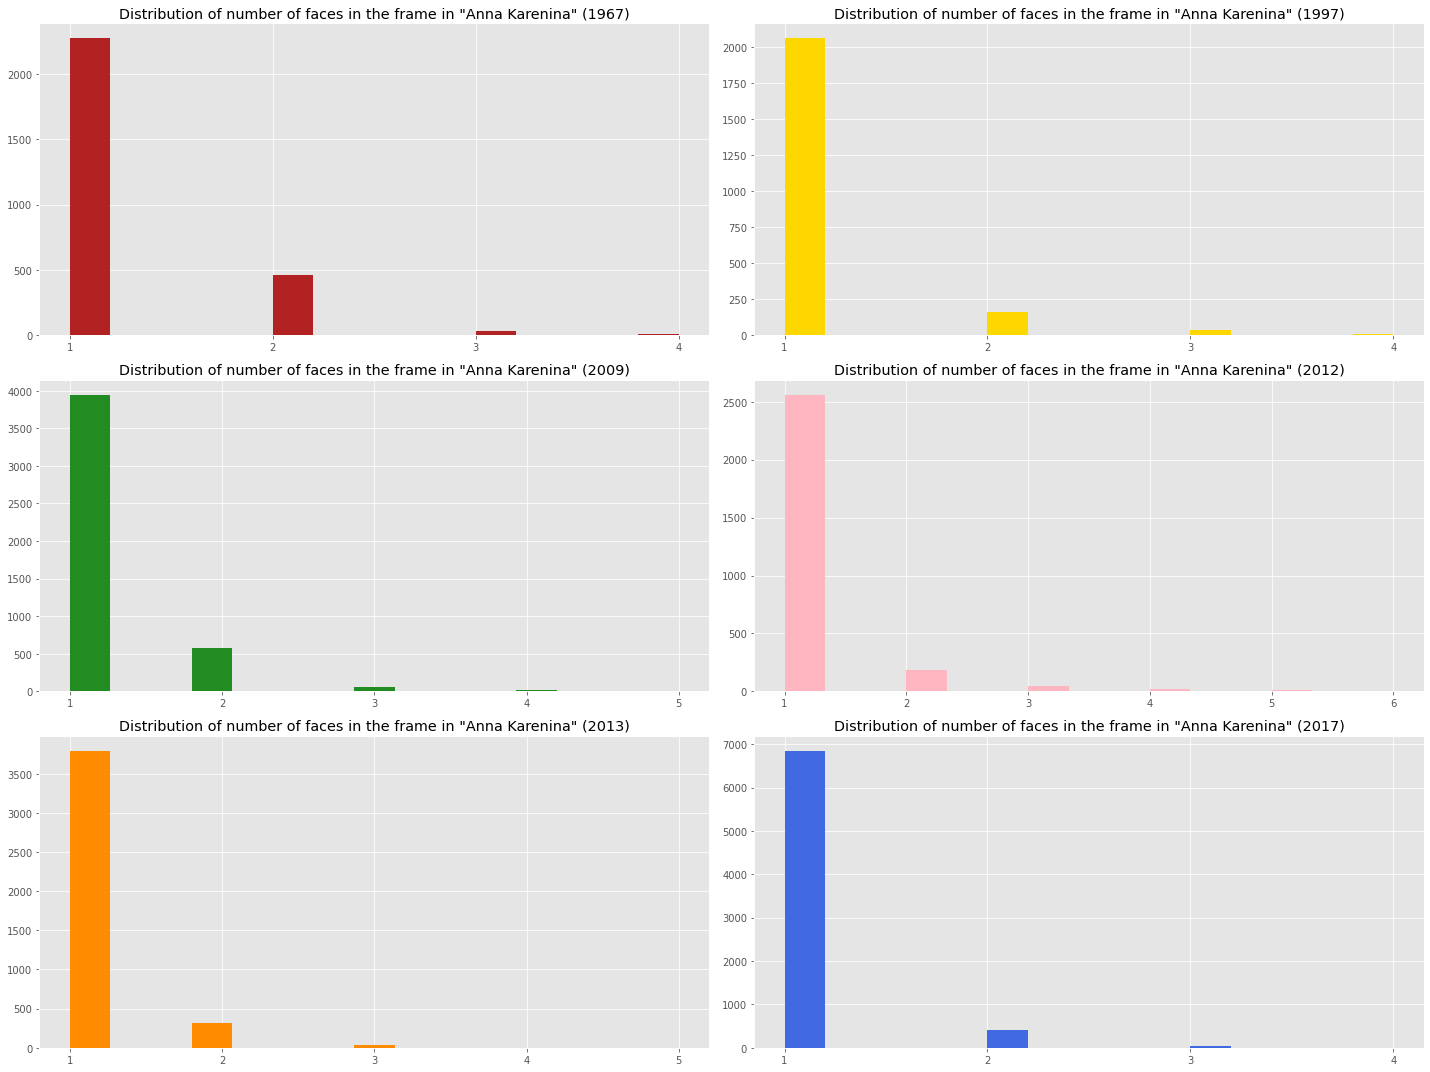

In [155]:
titles = ['Distribution of number of faces in the frame in "Anna Karenina" (1967)',
             'Distribution of number of faces in the frame in "Anna Karenina" (1997)',
              'Distribution of number of faces in the frame in "Anna Karenina" (2009)',
             'Distribution of number of faces in the frame in "Anna Karenina" (2012)',
             'Distribution of number of faces in the frame in "Anna Karenina" (2013)',
             'Distribution of number of faces in the frame in "Anna Karenina" (2017)']
colors = ['firebrick', 'gold', 'forestgreen', 'lightpink', 'darkorange', 'royalblue']
number_of_frames_in_film = [8552, 6468, 15340, 7764, 12105, 20895]

f,a = plt.subplots(3,2, figsize = (20, 15))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(all_num_of_faces[idx], color=colors[idx], bins=15)
    ax.set_title(titles[idx])
    ax.set_xticks(range(1, max(all_num_of_faces[idx])+1, 1))
#     ax.set_xlabel(bins[idx], rotation = 45)
#     ax.set_ylabel(yaxes[idx])
plt.tight_layout()

In [14]:
def count_mean_percentage_of_faces(list_of_df):
    all_mean_percentages = []
    for df in list_of_df:
        mean_percentages = []
        for perc in df['face_percentage']:
            if len(perc) == 0:
                mean_percentages.append(0) 
            else:
                mean_percentages.append(sum(perc)/len(perc))
        all_mean_percentages.append(mean_percentages)
    return all_mean_percentages

In [15]:
def count_original_percentage_of_faces(list_of_df):
    all_original_percentages = []
    for df in list_of_df:
        original_percentages = []
        for perc in df['face_percentage']:
            if len(perc) == 0:
                original_percentages.append(0) 
            else:
                for element in perc:
                    original_percentages.append(element)
        all_original_percentages.append(original_percentages)
    return all_original_percentages

In [16]:
all_mean_percentages = count_mean_percentage_of_faces(list_of_all_films_df)
all_original_percentages = count_original_percentage_of_faces(list_of_all_films_df)

In [159]:
def hist_of_all_percentages(list_of_percentages, kind, bins=15):
    titles = ['Distribution of {}face percentages in the frames of "Anna Karenina" (1967)'.format(kind),
             'Distribution of {}face percentages in the frames of "Anna Karenina" (1997)'.format(kind),
              'Distribution of {}face percentages in the frames of "Anna Karenina" (2009)'.format(kind),
             'Distribution of {}face percentages in the frames of "Anna Karenina" (2012)'.format(kind),
             'Distribution of {}face percentages in the frames of "Anna Karenina" (2013)'.format(kind),
             'Distribution of {}face percentages in the frames of "Anna Karenina" (2017)'.format(kind)]
    colors = ['firebrick', 'gold', 'forestgreen', 'lightpink', 'darkorange', 'royalblue']

    f,a = plt.subplots(3,2, figsize = (20, 15))
    a = a.ravel()
    for idx,ax in enumerate(a):
        ax.hist(list_of_percentages[idx], color=colors[idx], bins=bins)
        ax.set_title(titles[idx])
        ax.set_xticks(range(0,int(max(list_of_percentages[idx]))+5,2))
#         ax.set_xlabel(list(set(list_of_percentages[idx]))[::5], rotation = 45)
    #     ax.set_ylabel(yaxes[idx])
    plt.tight_layout()

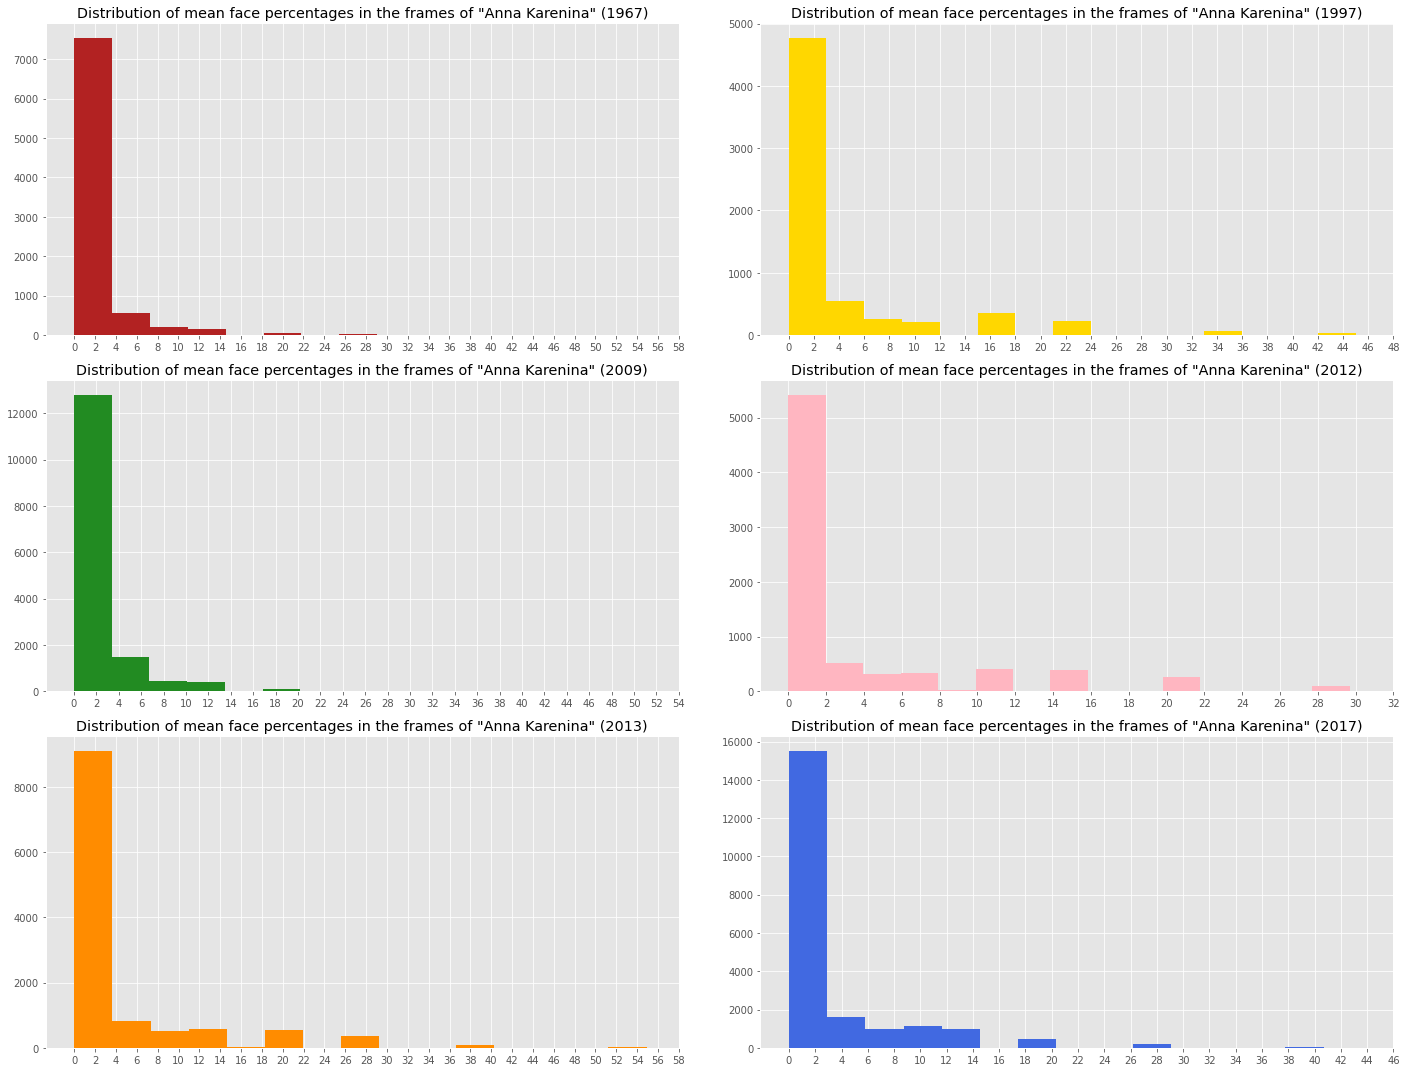

In [160]:
hist_of_all_percentages(all_mean_percentages, 'mean ')

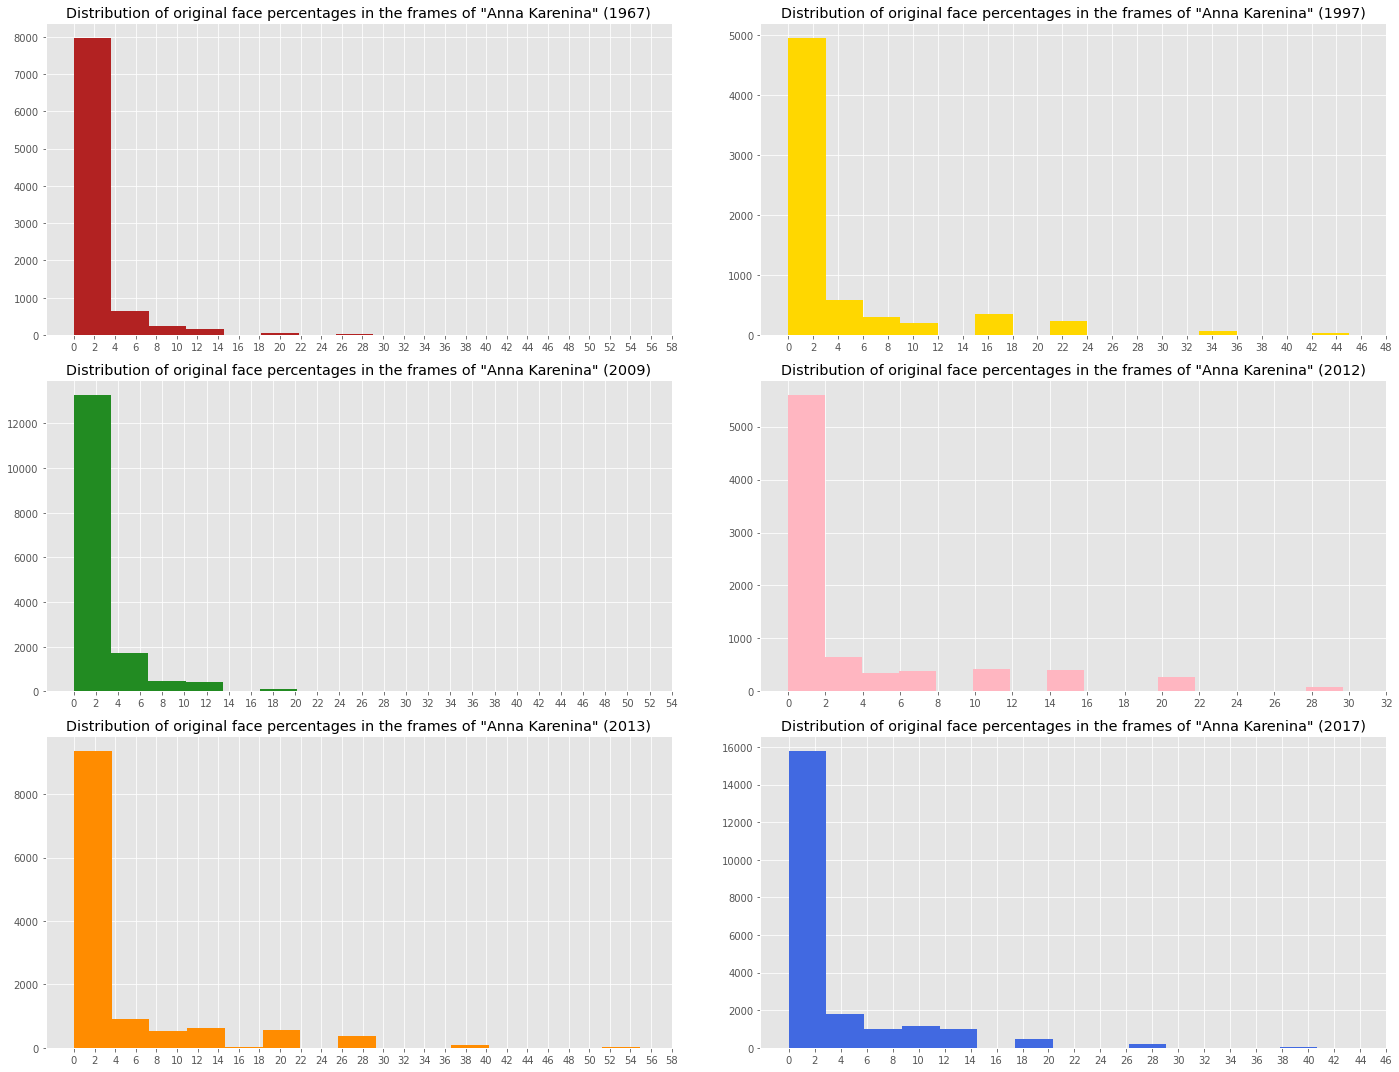

In [161]:
hist_of_all_percentages(all_original_percentages, 'original ')

# Работа с кадрами, где одно лицо только

In [17]:
df_of_one_face_shots_per_film = one_face_frames(list_of_all_films_df)

In [18]:
all_one_face = []
for df in df_of_one_face_shots_per_film:
    one_face_percentages = []
    for perc in df['face_percentage']:
        if perc == '[]':
            one_face_percentages.append(0) 
        else:
            for element in perc:
                one_face_percentages.append(element)
    all_one_face.append(one_face_percentages)

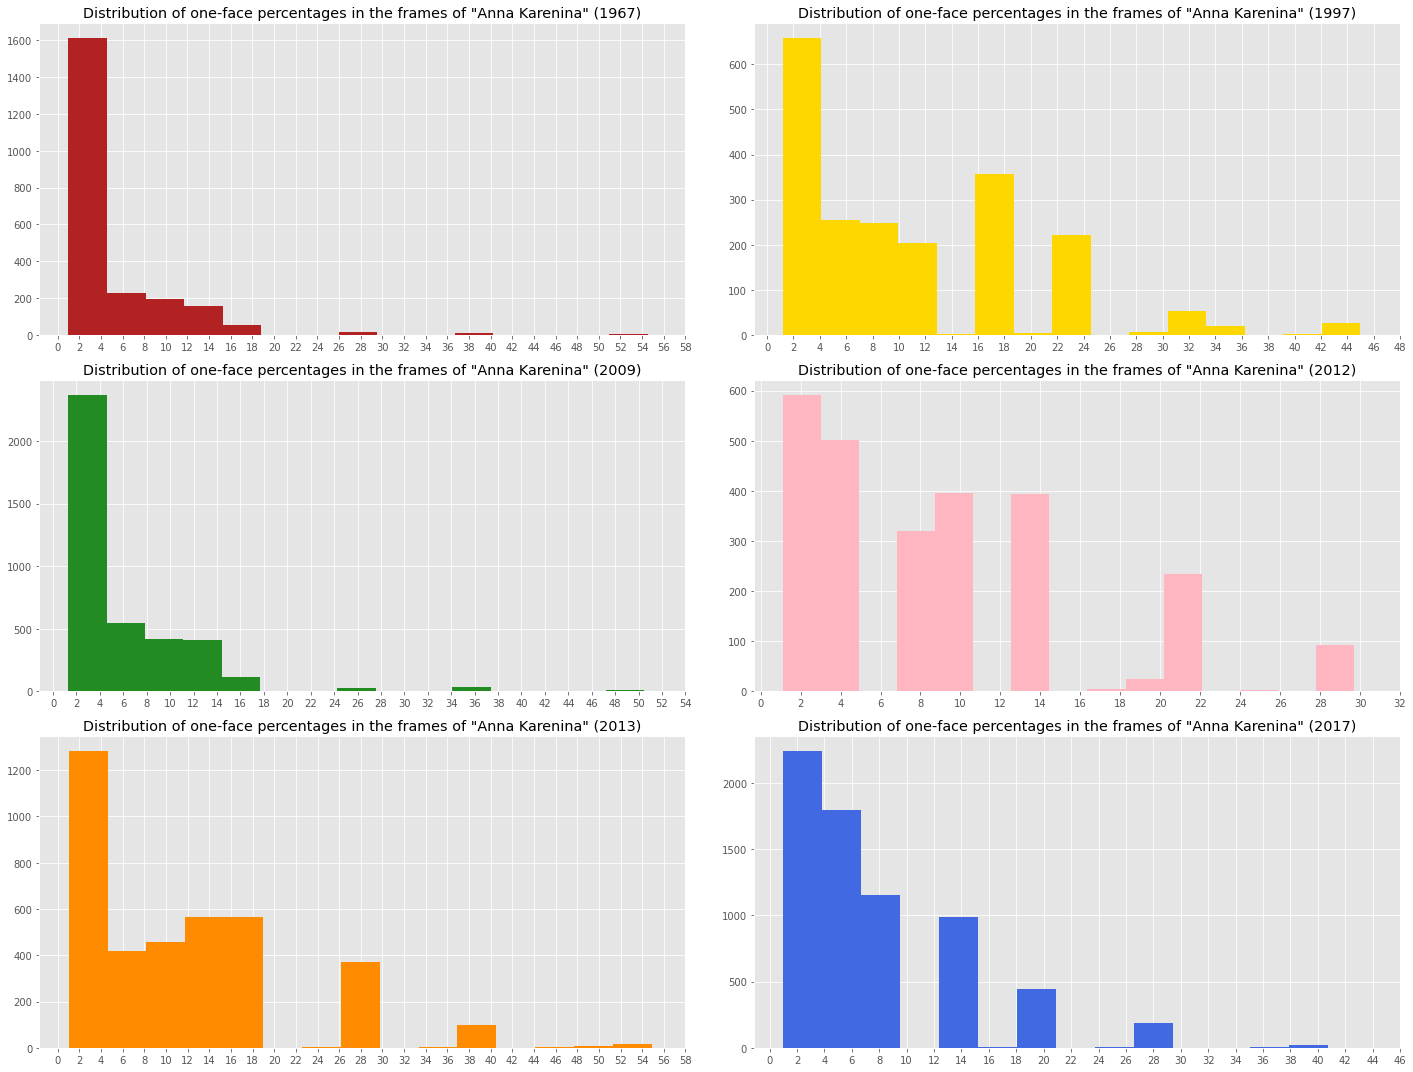

In [164]:
hist_of_all_percentages(all_one_face, 'one-')

number_of_frames_in_film = [8552, 6468, 15340, 7764, 12105, 20895]

In [19]:
all_one_face_close_ups = []
for df in df_of_one_face_shots_per_film:
    one_close_up_face_percentages = []
    for perc in df['face_percentage']:
        for element in perc:
            if element >= 10:
                one_close_up_face_percentages.append(element)
    all_one_face_close_ups.append(one_close_up_face_percentages)

In [20]:
[len(lst) for lst in all_one_face_close_ups]

[241, 897, 612, 917, 1634, 1662]

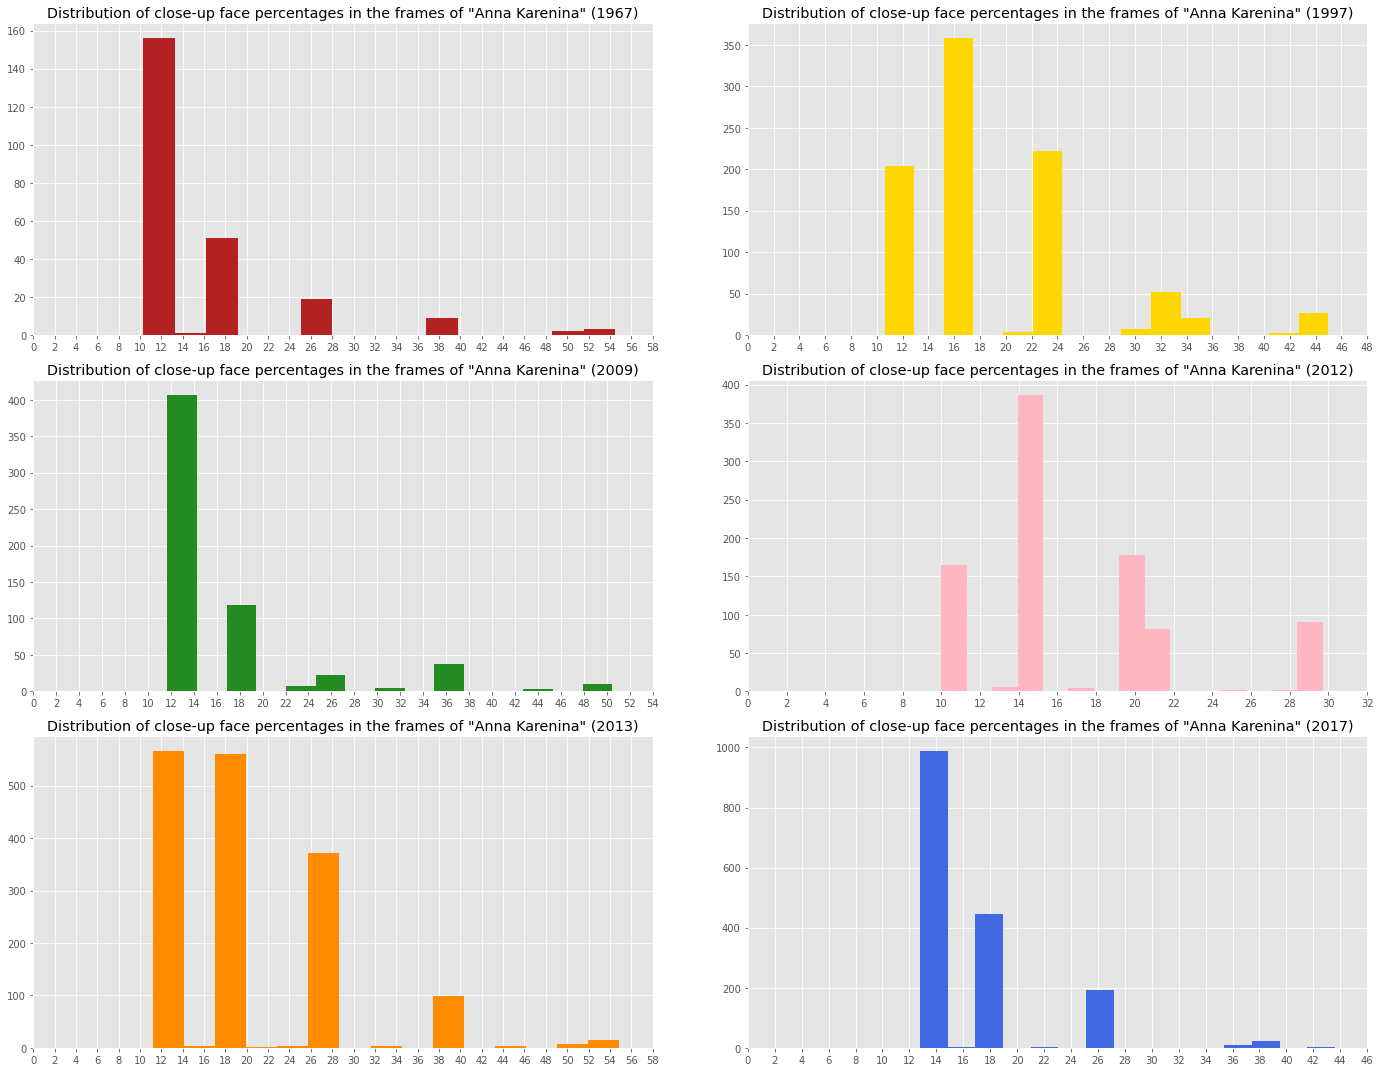

In [167]:
hist_of_all_percentages(all_one_face_close_ups, 'close-up ')

In [21]:
import collections
def creating_dict_with_shot_num_and_face_percentage(one_face_df, year, number_of_episode, 
                                                    num_of_shots_in_previous_episode):
    percentage_per_n_frame= {}
    for index, row in one_face_df.iterrows():
        if re.findall('{}_{}_'.format(year, number_of_episode), row[1]):
            percentage_per_n_frame[int(row[1][row[1].rfind('_') + 1: -4])+
                                     num_of_shots_in_previous_episode]= row[3][0]
            
    sorted_dict_with_shot_num_and_face_percentage = collections.OrderedDict(sorted(percentage_per_n_frame.items()))
    return sorted_dict_with_shot_num_and_face_percentage


In [22]:
dict_1967_full = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[0], '1967', '1', 0)
dict_1967_full.update(
    creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[0], '1967', '2', 4528))


dict_1997_full = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[1], '1997', '1', 0)

dict_2009_1 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[2], '2009', '1', 0)
dict_2009_2 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[2], '2009', '2', 0)
dict_2009_3 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[2], '2009', '3', 0)
dict_2009_4 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[2], '2009', '4', 0)
dict_2009_5 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[2], '2009', '5', 0)
dict_2009_full = [dict_2009_1, dict_2009_2, dict_2009_3, dict_2009_4, dict_2009_5]

dict_2012_full = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[3], '2012', '1', 0)

dict_2013_full = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[4], '2013', '1', 0)
dict_2013_full.update(
    creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[4], '2013', '2', 5879))

dict_2017_1 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '1', 0)
dict_2017_2 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '2', 0)
dict_2017_3 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '3', 0)
dict_2017_4 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '4', 0)
dict_2017_5 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '5', 0)
dict_2017_6 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '6', 0)
dict_2017_7 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '7', 0)
dict_2017_8 = creating_dict_with_shot_num_and_face_percentage(df_of_one_face_shots_per_film[5], '2017', '8', 0)
dict_2017_full = [dict_2017_1, dict_2017_2, dict_2017_3, dict_2017_4, dict_2017_5, dict_2017_6, dict_2017_7, dict_2017_8]

In [24]:
dict_2017_8.values()

odict_values([1.4, 1.0, 1.0, 1.4, 1.4, 1.4, 1.0, 1.0, 1.0, 1.5, 1.0, 2.1, 2.1, 4.3, 3.0, 3.0, 2.1, 4.3, 2.1, 3.0, 3.0, 3.0, 3.0, 3.0, 4.3, 3.0, 6.2, 6.2, 6.2, 6.2, 8.9, 8.9, 6.2, 6.2, 6.2, 8.9, 4.4, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 6.2, 4.3, 6.2, 4.3, 4.4, 4.3, 4.4, 4.3, 4.3, 4.3, 4.3, 9.0, 12.9, 3.0, 3.0, 8.9, 6.2, 6.2, 8.9, 6.2, 1.0, 6.2, 6.2, 4.3, 4.4, 6.2, 4.4, 4.3, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 12.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 12.8, 4.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.4, 1.4, 1.5, 1.4, 1.4, 1.4, 1.4, 1.5, 1.4, 1.0, 3.0, 3.0, 3.0, 3.0, 2.1, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.2, 8.9, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.2, 2.1, 2.1, 3.0, 2.1, 2.1, 3.0, 3.0, 2.1, 1.4, 1.5, 1.0, 2.1, 2.1, 4.3, 3.0, 4.3, 4.4, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 18.7, 18.6, 18.5, 18.5, 8.9, 8.9, 12.9, 12.9, 12.8, 18.7, 18.6, 18.7, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 8.9, 12.9, 1.0, 1.0, 1.0, 2.1, 2.1, 3.0, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.3, 4.3, 4.4, 4.3, 3.0, 4.3, 

In [170]:
def visualize_hist_of_one_face_frames(dictionary, color, num_of_shots_in_film, year):
    fig = plt.figure(figsize=(15,5))
    plt.vlines(dictionary.keys(), 0, dictionary.values(), color=color, linewidth=0.5)
    plt.style.use('ggplot')
    plt.xticks(np.arange(0, num_of_shots_in_film, 250), rotation = 45)
    plt.title("One-face shots and its percentages on the timeline of 'Anna Karenina' ({})".format(year))
    plt.xlabel("Frame number")
    plt.ylabel("Percentage of face")
    frame_range = np.arange(num_of_shots_in_film)
    k, b = np.polyfit(list(dictionary.keys()), list(dictionary.values()), 1)
    plt.plot(frame_range, k * frame_range + b, c='b')
    plt.show()

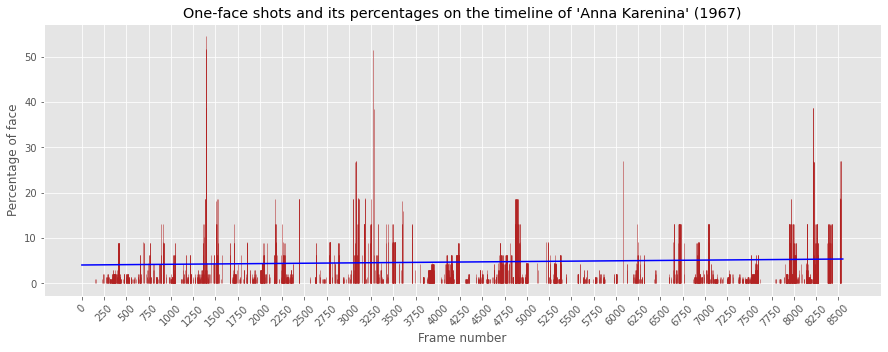

In [171]:
visualize_hist_of_one_face_frames(dict_1967_full, 'firebrick', 8552, '1967')

Исследуя частоту появления кадров с крупным планом, стоит обратиться к временным шкалам киноадаптаций. Благодаря ним видно, в каких частях фильма какой процент лицо занимает в кадре и меняется ли тенденция в обращении к крупным планам на протяжении фильма. Так, для фильмов 1997 и 2012 года виден постепенный рост процента лица на изображении ближе к финалу ленты, в чем вероятно проявляется прием саспенса - стремление режиссеров вызвать у зрителя предчувствие катастрофы и создать атмосферу напряженного ожидания. Это же будет релевантно и для некоторых эпизодов русских сериалов, которые помимо саспенса используют клиффхэнгер, благодаря чему сохраняется интрига (особенно это актуально для сериала 2017 года, который обладает параллельной режиссерской сюжетной линией). Уменьшение процента площади лица в конце пятой серии соловьевского сериала объясняется скорее всего тем, что экранизация не заканчивается смертью Анны и в ней отражена восьмая часть романа. Стоит отметить, однако, что падение синей регрессионной прямой указывает лишь на общую для фильма тенденцию увеличения или уменьшения площади лица в кадре. Это не противоречит тому, что в конце после череды кадров с общим планом внезапно появится всплеск кадров крупного плана. Это видно на примере второго эпизода сериала Шахназарова, интенсивность использования крупных планов у которого падает во второй половине серии, но они все равно появляются, в том числе и с большими процентными показателями. То же самое можно сказать и про четвертый эпизод сериала Соловьева.

Двухчастные фильмы репрезентируют две противоположные ситуации, при которых градус регрессионной прямой равен нулю. В случае экранизации 2013 года это связано со стабильностью использования планов разных масштабов: кадры с лицами разных площадей перемежаются между собой, в результате чего видно несколько кадровых пластов: где лицо занимает 13%, 18%, 27% и 38%. Кажется, что структура организации кадров в экранизации является если не предсказуемой, то очень точной и однообразной (вспомним результаты из первой главы, где большинство кадров попало в кластер именно крупных планов).
Тем временем в киноверсии Зархи кадры с одним лицом, а уж тем более крупные планы, появляются гораздо реже. Более того, изображения, где половина пространства отведена мимике актера, единичны, а потому несложно предположить, что они будут посвящены переломным моментам в романе - балу (Анна и Вронский влюбляются друг в друга), скачкам (гибель Фру-Фру традиционно считается предзнаменованием гибели Анны в будущем) и сцене с Анной на перроне перед самоубийством. В действительности предположение правдиво и, что самое интересное, в сцене бала (примерно промежуток с 1250 по 1500 кадры) сверхкрупным планом запечатлена именно Кити и ее взгляд на танцующих Анну и Вронского. В сцене со скачками - очень разноплановой, судя по графику, - сверхкрупный план снова акцентирует взгляд, но уже Анны (по факту под него отведено всего 5 секунд, т.е. пять кадров, которые при этом перемежаются с крупным планом лошадиных глаз, благодаря чему зритель может уловить проведенную режиссером параллель между судьбами Анны и Фру-Фру). Наконец, в финале фильма почти 40%-ый крупный план посвящен Анне, которая по сюжету романа ссорится с Вронским перед самоубийством и произносит роковую фразу "Вы... вы раскаетесь в этом", а 28%-ый - как раз героине перед самоубийством. 


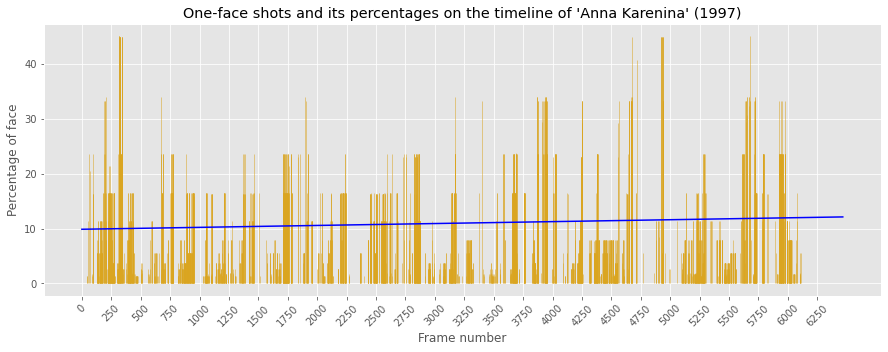

In [172]:
visualize_hist_of_one_face_frames(dict_1997_full, 'goldenrod', 6468, '1997')

IndexError: list index out of range

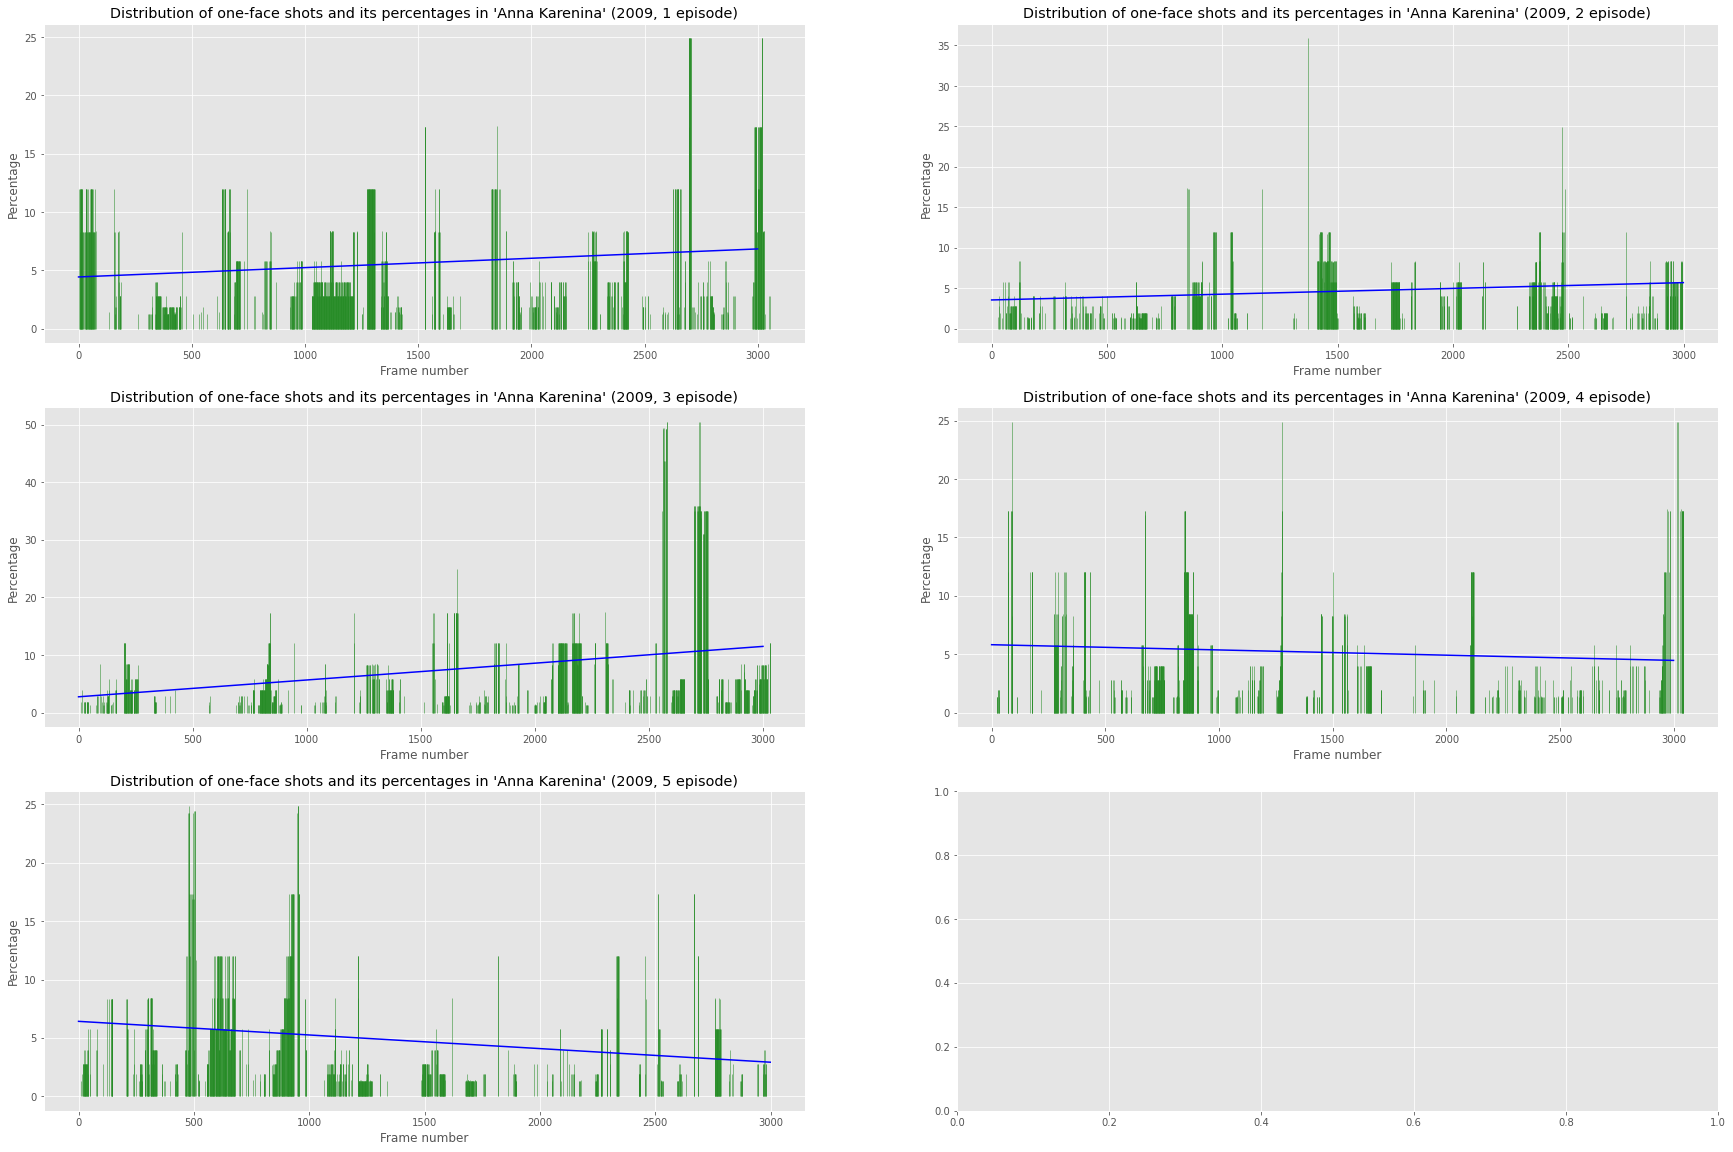

In [173]:
f,a = plt.subplots(3,2, figsize = (30, 20))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.vlines(dict_2009_full[idx].keys(), 0, dict_2009_full[idx].values(), color='forestgreen', linewidth=0.5)
    ax.set_title("Distribution of one-face shots and its percentages in 'Anna Karenina' (2009, {} episode)".format(idx + 1))
    ax.set_xlabel('Frame number')
    ax.set_ylabel('Percentage')
    frame_range = np.arange(3000)
    k, b = np.polyfit(list(dict_2009_full[idx].keys()), list(dict_2009_full[idx].values()), 1)
    ax.plot(frame_range, k * frame_range + b, c='b')
plt.tight_layout()

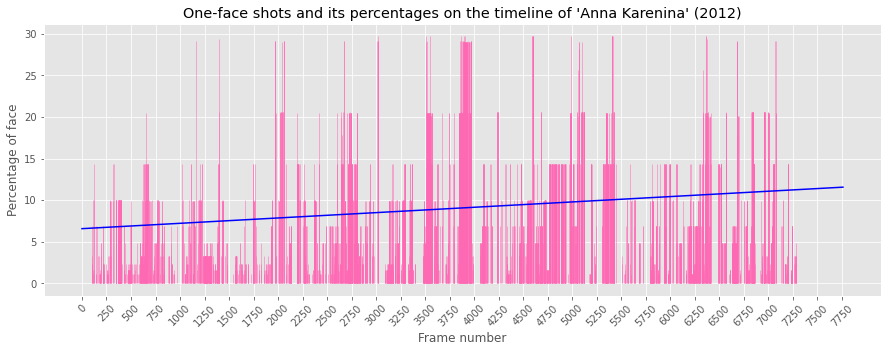

In [174]:
visualize_hist_of_one_face_frames(dict_2012_full, 'hotpink', 7764, '2012')

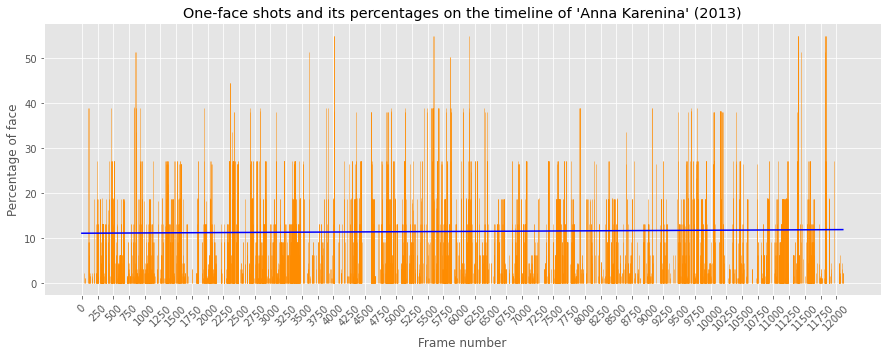

In [175]:
visualize_hist_of_one_face_frames(dict_2013_full, 'darkorange', 12105, '2013')

Двухчастные фильмы репрезентируют две противоположные ситуации, при которых градус регрессионной прямой равен нулю. В случае экранизации 2013 года это связано со стабильностью использования планов разных масштабов: кадры с лицами разных площадей перемежаются между собой, в результате чего видно несколько кадровых пластов: где лицо занимает 13%, 18%, 27% и 38%. Кажется, что структура организации кадров в экранизации является если не предсказуемой, то очень точной и однообразной (вспомним результаты из первой главы, где большинство кадров попало в кластер именно крупных планов). Киноверсия Зархи, в свою очередь, разнообразна 

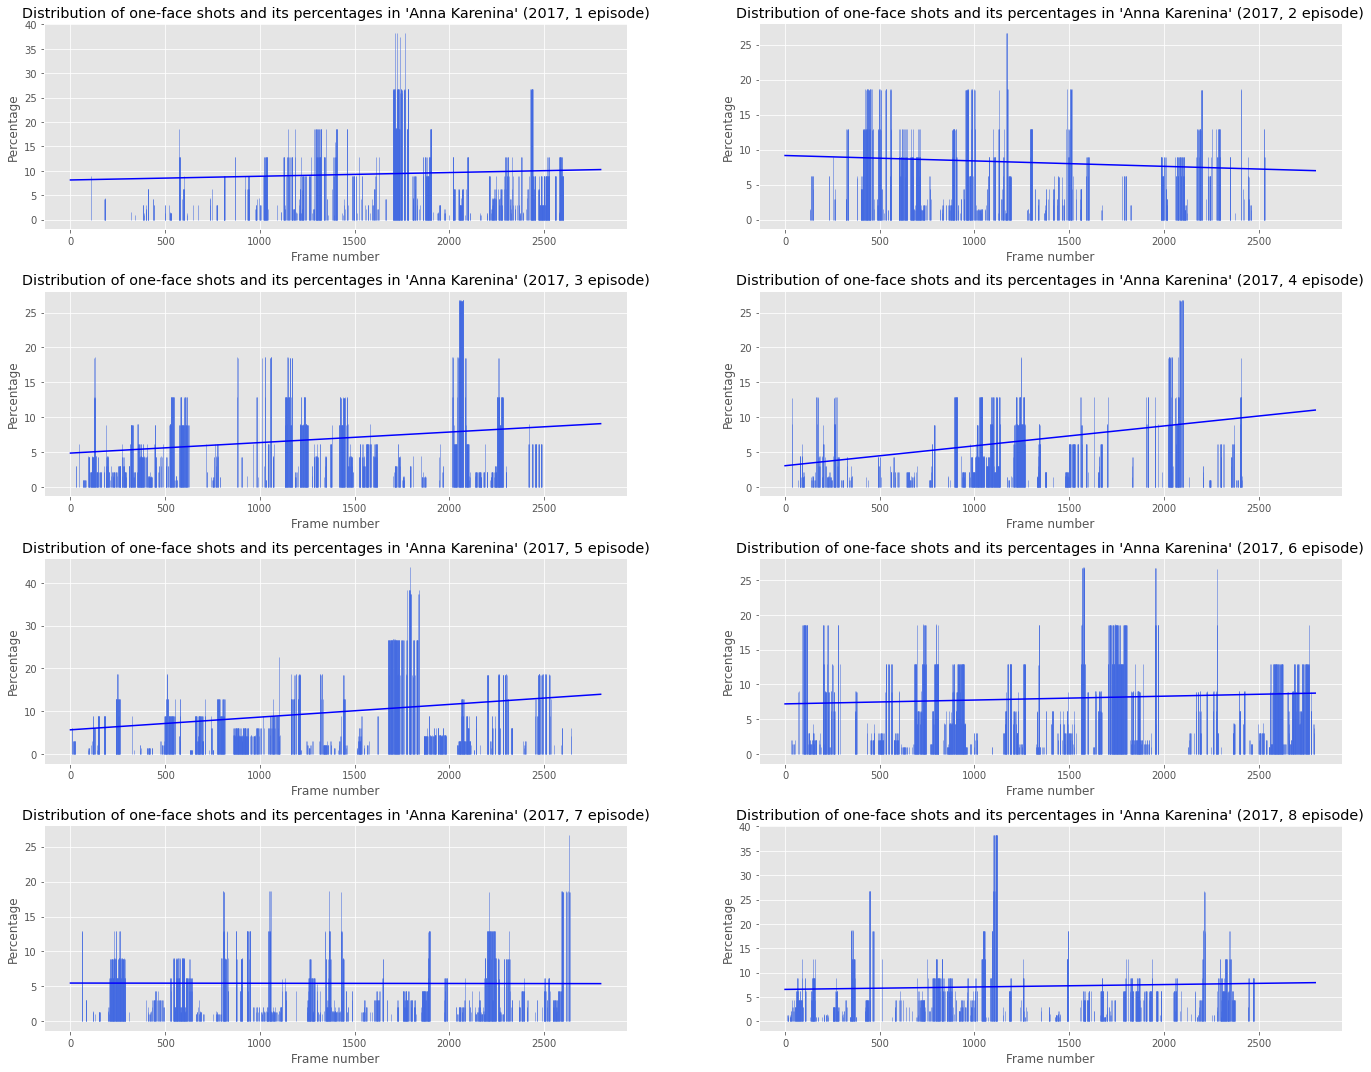

In [176]:
f,a = plt.subplots(4,2, figsize = (20, 15))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.vlines(dict_2017_full[idx].keys(), 0, dict_2017_full[idx].values(), color='royalblue', linewidth=0.5)
    ax.set_title("Distribution of one-face shots and its percentages in 'Anna Karenina' (2017, {} episode)".format(idx + 1))
    ax.set_xlabel('Frame number')
    ax.set_ylabel('Percentage')
    frame_range = np.arange(2800)
    k, b = np.polyfit(list(dict_2017_full[idx].keys()), list(dict_2017_full[idx].values()), 1)
    ax.plot(frame_range, k * frame_range + b, c='b')
plt.tight_layout()

# Исследование локации

In [177]:
def greatest_third_part_area_count(face_coords, img_width, img_height=None):

    y_top_right, x_top_right,  y_bottom_left, x_bottom_left = face_coords
#     plt.scatter(x_top_right, y_top_right)
#     plt.scatter(x_bottom_left, y_bottom_left)
#     plt.scatter(x_top_right, y_bottom_left)
#     plt.scatter(x_bottom_left, y_top_right)
#     plt.xlim((0,img_width))
#     plt.ylim((0,img_height))
#     plt.vlines(1/3, 0, img_height)
#     plt.vlines(2/3, 0, img_height)
    
    face_height = y_bottom_left - y_top_right
    x1_third, x2_third = img_width / 3, 2 * img_width / 3
    if x_top_right > x2_third and x_bottom_left < x1_third:
        return 2
    
    if x_top_right > x2_third > x_bottom_left:
        if x_top_right - x2_third >= x2_third - x_bottom_left:
            return 3
        else: 
            return 2
    
    if x_top_right > x1_third > x_bottom_left:
        
        if x_top_right - x1_third > x1_third - x_bottom_left:
            return 2
        else: 
            return 1
    
    if x_top_right > x2_third:
        return 3
    elif x_top_right < x1_third:
        return 1
    else:
        return 2
    
    

In [236]:
def greatest_third_part_intersection(face_coords, img_width, img_height=None):

    y_top_right, x_top_right,  y_bottom_left, x_bottom_left = face_coords
#     plt.scatter(x_top_right, y_top_right)
#     plt.scatter(x_bottom_left, y_bottom_left)
#     plt.scatter(x_top_right, y_bottom_left)
#     plt.scatter(x_bottom_left, y_top_right)
#     plt.figure(20,15)
#     plt.scatter((x_top_right+x_bottom_left)/2, (y_top_right+y_bottom_left)/2, color=color)
#     plt.title("Centers of close-ups in 'Anna Karenina' ({})".format(year), fontsize=12)
#     plt.xlim((0,img_width))
#     plt.ylim((0,img_height))
#     plt.vlines(1/2 * img_width , 0, img_height)
#     plt.hlines(1/2 * img_height, 0, img_width)
    face_height = y_bottom_left - y_top_right
    x1_third, x2_third = img_width / 3, 2 * img_width / 3
    if x_top_right > x2_third and x_bottom_left < x1_third:
        return 2
    if x_top_right > x2_third:
        return "The face is located in the 3 third of the image"
    elif x_bottom_left < x1_third:
        return "The face is located in the 1 third of the image"
    else:
        return 2
    
    

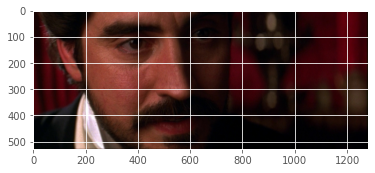

'The face is located in the 1 third of the image'

In [246]:
import copy
import cv2
image_show = cv2.imread('/Users/tonleon/Desktop/Diploma/1997/1997_1_328.jpg')
rgb = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB)
image = face_recognition.load_image_file('/Users/tonleon/Desktop/Diploma/1997/1997_1_328.jpg')
image_copy = image.copy()
full_img_size = image.shape[0]*image.shape[1]
all_face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=2)

# for (x, y, w, h) in all_face_locations:
#         cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.imshow(rgb)
plt.show()

greatest_third_part_intersection(all_face_locations[0], 1280, 528)



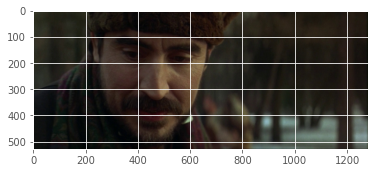

In [244]:
image_show = cv2.imread('/Users/tonleon/Desktop/Diploma/1997/1997_1_202.jpg')
rgb = cv2.cvtColor(image_show, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb)
plt.imshow(pil_image)

In [186]:
for df in df_of_one_face_shots_per_film:
    df['face_location'] = None
    for index, row in df.iterrows():
        location= greatest_third_part_intersection(row[4][0],row['image_width'], row['image_height'])
        df.at[index,'face_location'] = location

In [187]:
df_of_one_face_shots_per_film[5].head()

,Unnamed: 0,frame_num,num_of_faces,face_percentage,face_coordinates,image_width,image_height,face_location
4412,4412,2017_7_2169.jpg,1,[1.0],"[(99, 301, 153, 247)]",720,400,2
12711,12711,2017_6_1633.jpg,1,[1.0],"[(99, 397, 153, 343)]",720,400,2
18021,18021,2017_4_2242.jpg,1,[1.0],"[(51, 373, 105, 319)]",720,400,2
18027,18027,2017_6_656.jpg,1,[1.0],"[(99, 510, 153, 456)]",720,400,3
12731,12731,2017_3_69.jpg,1,[1.0],"[(314, 618, 368, 564)]",720,400,3


In [56]:
all_one_face_locations = []
for df in df_of_one_face_shots_per_film:
    face_location = []
    for location in df['face_location']:
        face_location.append(location)
    all_one_face_locations.append(face_location)

In [190]:
def hist_of_face_locations(list_of_one_face_locations):
    titles = ['Distribution of one-face locations in the close-up frames of "Anna Karenina" (1967)',
             'Distribution of one-face locations in the close-up frames of "Anna Karenina" (1997)',
              'Distribution of one-face locations in the close-up frames of "Anna Karenina" (2009)',
             'Distribution of one-face locations in the close-up frames of "Anna Karenina" (2012)',
             'Distribution of one-face locations in the close-up frames of "Anna Karenina" (2013)',
             'Distribution of one-face locations in the close-up frames of "Anna Karenina" (2017)']
    colors = ['firebrick', 'gold', 'forestgreen', 'lightpink', 'darkorange', 'royalblue']

    f,a = plt.subplots(3,2, figsize = ( 20, 15))
    a = a.ravel()
    for idx,ax in enumerate(a):
        ax.hist(list_of_one_face_locations[idx], color=colors[idx], bins=3)
        ax.set_title(titles[idx])
        ax.set_xticks(range(1,4,1))
    plt.tight_layout()

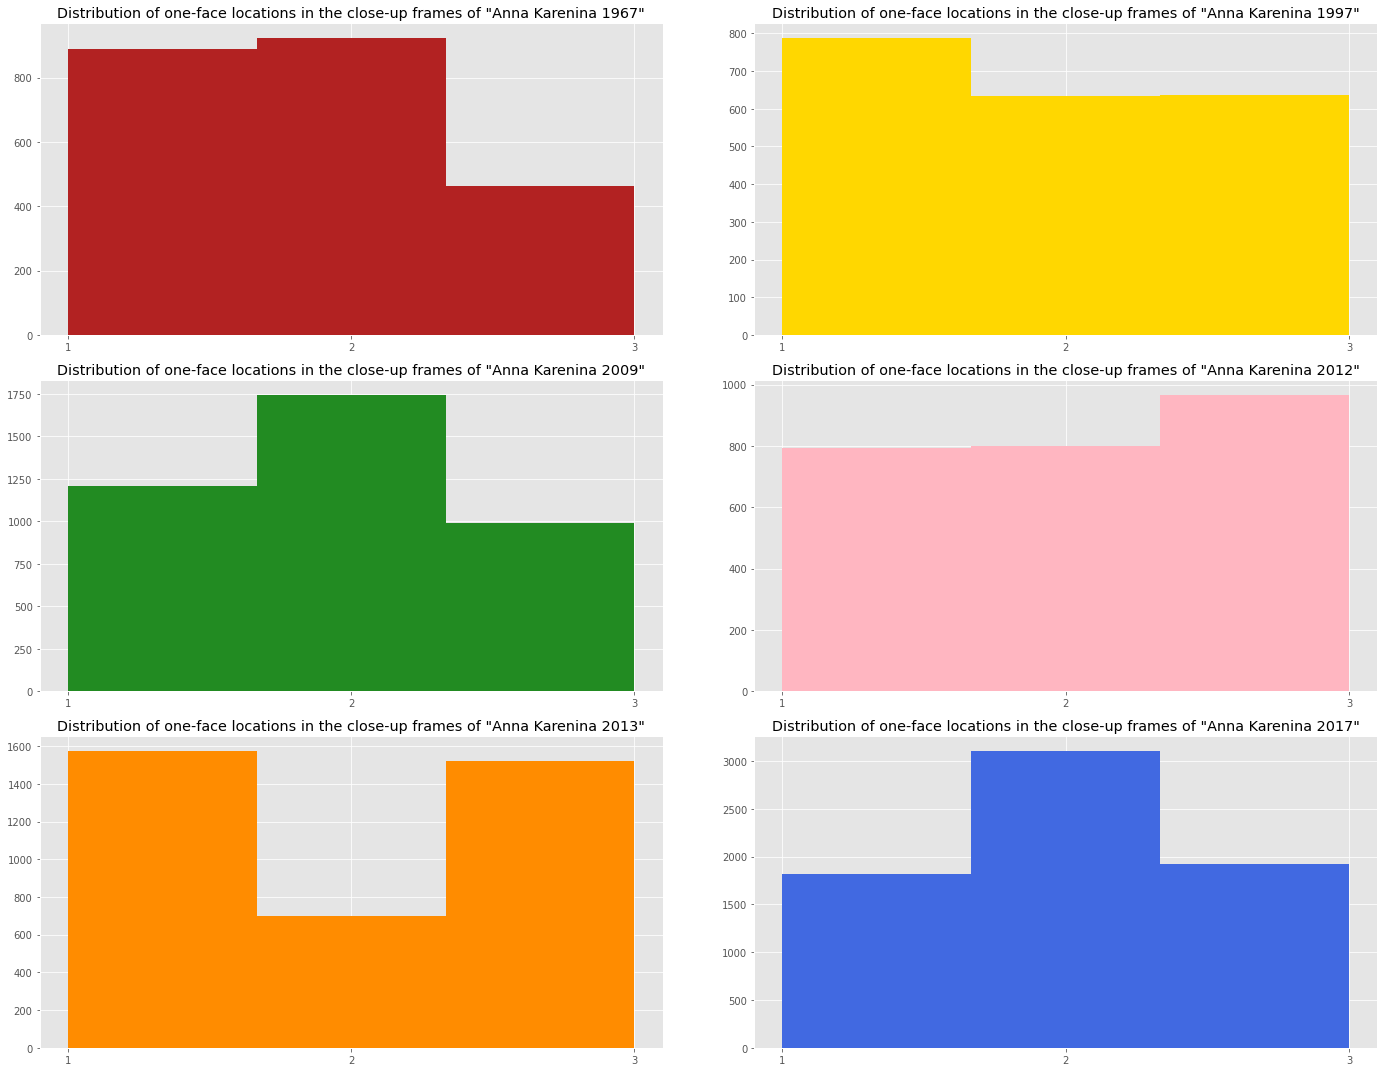

In [141]:
hist_of_face_locations(all_one_face_locations)

In [188]:
close_ups_in_films = []
for data in df_of_one_face_shots_per_film:
    close_up = []
    for index, row in data.iterrows():
        if row[3][0] >= 10:
            close_up.append(row[7])
    close_ups_in_films.append(close_up)

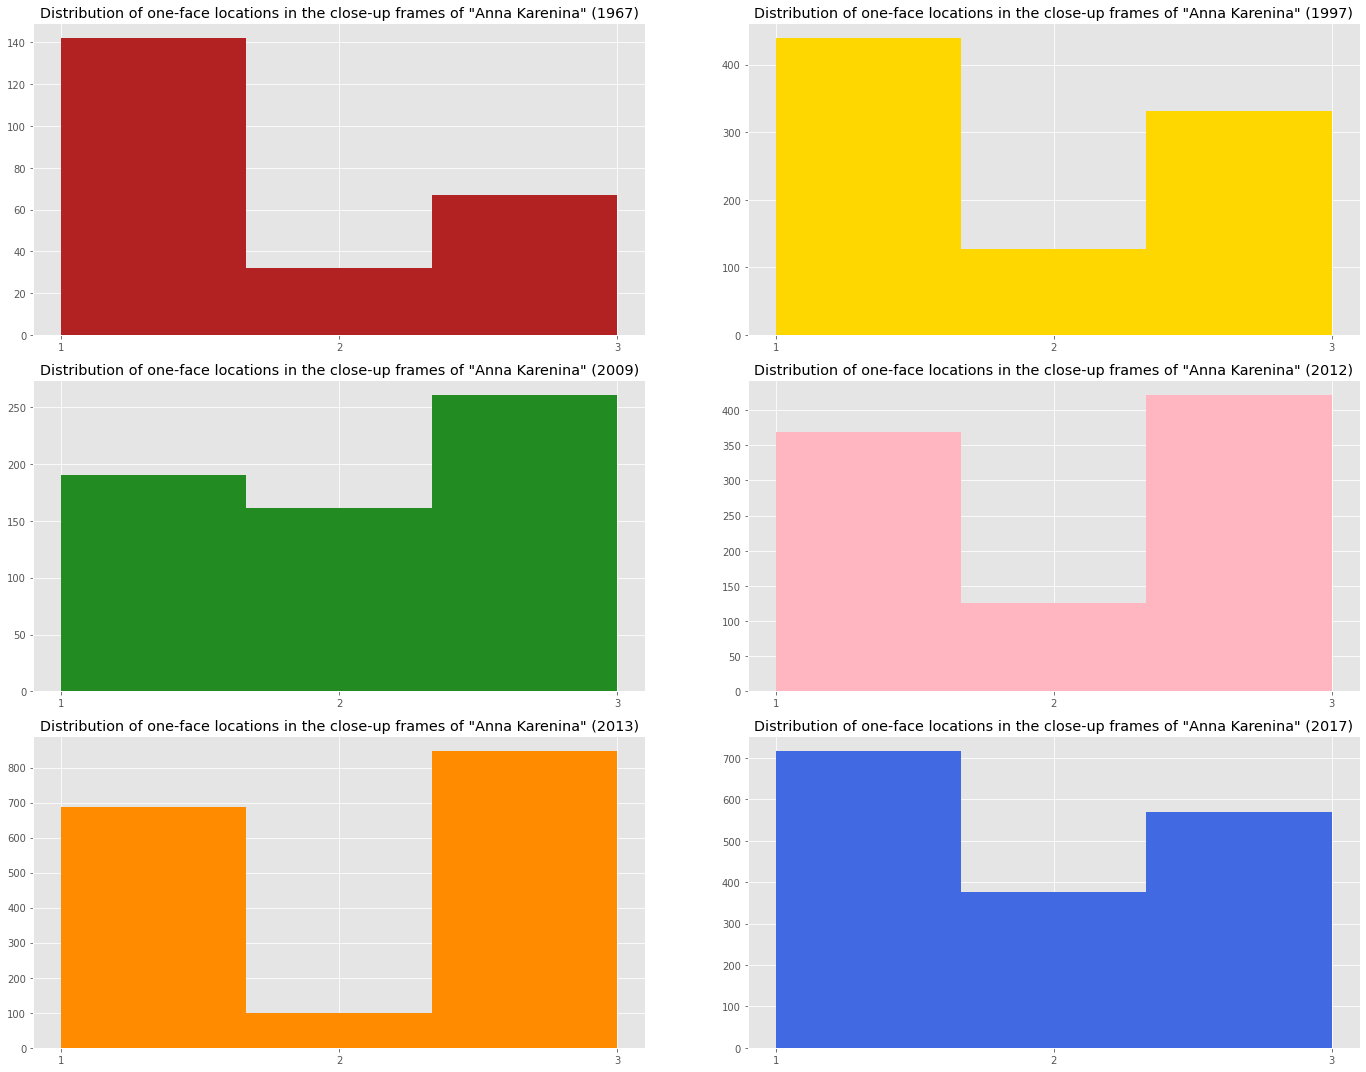

In [191]:
hist_of_face_locations(close_ups_in_films)

In [87]:
 small_face_percent_treshold=1.
image = face_recognition.load_image_file('/Users/tonleon/Desktop/Diploma/1997/1997_1_1072.jpg')
full_img_size = image.shape[0]*image.shape[1]
all_face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=2)

big_face_percentages = []
big_face_locations = []
for face_location in all_face_locations:
    top, right, bottom, left = face_location
    face_square = (bottom-top)*(right-left)
    percentage_of_face_in_img = (face_square/full_img_size)*100
    if percentage_of_face_in_img > small_face_percent_treshold:
        big_face_percentages.append(round(percentage_of_face_in_img, 1))
        big_face_locations.append(face_location)

In [88]:
big_face_percentages

[1.3]

In [71]:
len(close_ups_in_films)

6

In [ ]:
Крупный план - в районе 20
Экстракрупный план - в районе 40 и выше